## **Data Preprocessing**

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder

# Load the data
data = pd.read_csv('stroke.csv')

# Fill missing values in numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Fill missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

# Encode categorical features using ordinal encoding
encoder = OrdinalEncoder()
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# Show the head of the preprocessed data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046.0,1,67.0,0.0,1.0,1,1,1,228.69,36.600000,1,1.0
1,51676.0,2,61.0,0.0,0.0,1,2,2,202.21,28.893237,2,1.0
2,31112.0,1,80.0,0.0,1.0,1,1,2,105.92,32.500000,2,1.0
3,60182.0,2,49.0,0.0,0.0,1,1,1,171.23,34.400000,3,1.0
4,1665.0,2,79.0,1.0,0.0,1,2,2,174.12,24.000000,2,1.0


## **ML Model Training and Testing Tasks**

In [4]:
# Split the processed data into training and testing sets (e.g., 80% training, 20% testing)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='stroke'), data['stroke'], test_size=0.2, random_state=42)

# Train a multi-layer perceptron model
# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(64,), (32,), (64, 32), (32, 16), (128, 64), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Create the grid search object

grid_search = GridSearchCV(MLPClassifier(max_iter=1000,random_state=42), param_grid, cv=5,scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (32,), (64, 32),
                                                (32, 16), (128, 64),
                                                (128, 64, 32)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='f1')

### *Best Parameters*

In [5]:
# Show the best hyperparameters

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'hidden_layer_sizes': (32,), 'learning_rate_init': 0.001}
Best score: 0.04485788113695091


### *Top-Performing Model*

In [6]:
# Show the best model
best_model = grid_search.best_estimator_
print(best_model)

# F1-Score

from sklearn.metrics import f1_score

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

MLPClassifier(hidden_layer_sizes=(32,), max_iter=1000, random_state=42)
F1-Score: 0.0


### *PCA*

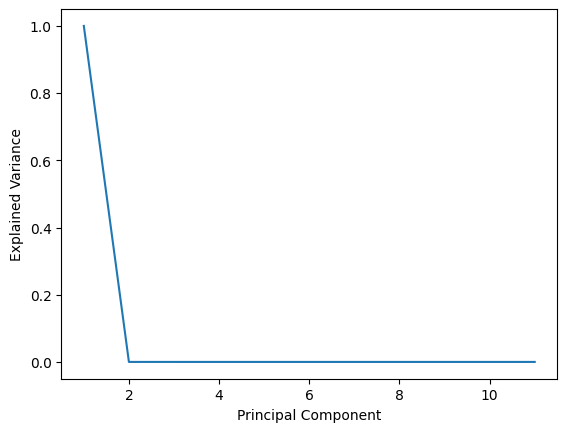

In [8]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.drop(columns='stroke'))

import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

* Optimal number of dimensions is 2.

### *Dimensionality Reduction*

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns='stroke'))

### *Train on new Dataset*

In [10]:
# Train a multi-layer perceptron model on the transformed dataset

X_train, X_test, y_train, y_test = train_test_split(X_pca, data['stroke'], test_size=0.2, random_state=42)

# Train a multi-layer perceptron model

param_grid = {
    'hidden_layer_sizes': [(64,), (32,), (64, 32), (32, 16), (128, 64), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000,random_state=42), param_grid, cv=5,scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (32,), (64, 32),
                                                (32, 16), (128, 64),
                                                (128, 64, 32)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='f1')

### *Best Parameters,Model & F1 Score*

In [11]:

print('Best hyperparameters:', grid_search.best_params_)

best_model = grid_search.best_estimator_
print(best_model)


# Evaluate the top-performing model from step 2 on the test set and report their F1-Score

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

Best hyperparameters: {'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001}
MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)
F1-Score: 0.10784313725490195


* Model got high F1-Score after the dimmensinality reduction using PCA.